In [2]:
from astropy.io import fits as pyfits
import numpy as np
SMC = pyfits.getdata('C:/Users/dougl/Desktop/smcw2-nd-intbgsub.fits')
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import SkyCircularAperture
from astropy.io import ascii
data = ascii.read("C:/Users/dougl/Desktop/star_clusters_SMC.csv", format='csv', fast_reader=False)
print(data)

         Names_1          _RAJ2000 _DEJ2000 ...  PA     Com         SimbadName  
------------------------- -------- -------- ... --- ------------ ---------------
  NGC220,K18,L22,ESO29SC3  10.1292 -73.4028 ...  --   mT,in H-A3         NGC 220
                      B27   10.175 -73.8722 ...  --           --        Bruck 27
  NGC222,K19,L24,ESO29SC4  10.1833 -73.3833 ...  --   mT,in H-A3         NGC 222
          B23,SMC_OGLE170  10.2292 -73.4019 ...  40   mT,in H-A3        Bruck 23
  NGC231,K20,L25,ESO29SC5   10.275 -73.3519 ...  --   mP,in H-A3         NGC 231
       K21,L27,SMC_OGLE12    10.35 -72.8908 ...  --           --      Cl Kron 21
              SMC_OGLE166  10.4833 -73.4878 ...  80           -- OGLE-Cl SMC 166
          HW16,SMC_OGLE13  10.5917 -73.7342 ...  --  mP,in DEMS7           HW 16
        NGC241,K22w,L29W,  10.8875 -73.4403 ...  -- mP & SOGLE17         NGC 241
           B33,SMC_OGLE23  11.0542 -73.6189 ...  --           --        Bruck 33
                      ...   

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import SkyCircularAperture, SkyCircularAnnulus, aperture_photometry
from astropy.wcs import WCS
hdu = pyfits.open('C:/Users/dougl/Desktop/smcw2-nd-intbgsub.fits', ignore_missing_end=True)
w = WCS(hdu[0].header)
hdu.info()

Filename: C:/Users/dougl/Desktop/smcw2-nd-intbgsub.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      18   (27207, 20790)   float32   


In [75]:
positions = SkyCoord(ra=data['_RAJ2000'] * u.deg, dec=data['_DEJ2000'] * u.deg, frame='fk5')
r=data['R_ap'] * u.arcsec

Real_phot_table = []
apertures_area = []
for i in range(0, 160):
    apertures = SkyCircularAperture(positions[i], r[i])
    pixl_apertures = apertures.to_pixel(w)
    apertures_area_loop = pixl_apertures.area()
    Fake_phot_table = aperture_photometry(hdu[0], apertures)
    Real_phot_table.append(Fake_phot_table['aperture_sum'][0])
    apertures_area.append(apertures_area_loop)
    
print(Real_phot_table)

[553.89677806746283, 17.260158307404726, 363.67726605070499, 150.40839083009803, 704.56128839476423, 53.750888421044969, 42.443942634107771, 262.98157677216284, 282.78621880591834, 17.0465795206105, 88.96993374407262, 137.78719893235996, 9.027491049652367, 20.699373581940371, 189.96333731526065, 185.93752571045945, 23.52330432183075, 71.776879616873799, 201.71725286177588, 89.304149846169224, 9.168968845066491, 109.43464984611138, 73.009528862791143, 2.879383590895229, 62.773162107937203, 211.70638386317538, 138.17685524995738, 376.56963679249367, 91.487256383916659, 28.91699033608722, 278.41366213512742, 122.66425817934804, 61.260546306584203, 123.66948116350579, 129.77977173270418, 417.67244122225406, 134.56700890372719, 83.059162968711718, 45.634551742821088, 262.10913205765297, 28.865385829751915, 137.61315874168815, 88.124597536213827, 69.631677148970937, 222.03171309834352, 58.731011918712326, 28.016988854151673, 750.17081173725251, 174.40618206677422, 497.36151532943529, 13.3663

In [73]:
hdu[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    2                                                  
NAXIS1  =                27207                                                  
NAXIS2  =                20790                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
EQUINOX =                 2000                                                  
CRVAL1  =         16.727693126                                                  
CRVAL2  =        -75.0127615

In [85]:


NUV_magnitude = []

for j in range(0, 160):
    mag_loop = (-2.5)*(np.log10(Real_phot_table[j]))+20.08
    NUV_magnitude.append(mag_loop)


print(NUV_magnitude)


[13.221427902675767, 16.987388063307957, 13.678209616055263, 14.636819837725936, 12.960203056230677, 15.754035882802111, 16.010460702789825, 14.030186687582081, 13.951354397746357, 17.000906878093708, 15.206891832127003, 14.731977821297379, 17.691082333710472, 16.790106993123779, 14.383325523118938, 14.406582381348509, 16.651254182261212, 15.440038564596996, 14.318142387558975, 15.202820898875576, 17.674198757356617, 14.982112868352386, 15.421551135231073, 18.931751186613429, 15.585564984592789, 14.265665114815086, 14.728911738985786, 13.640386751326014, 15.176598490724215, 16.42711727537041, 13.968273642801723, 14.858204908111713, 15.612047836450245, 14.849343653060647, 14.796982485123277, 13.527910448298471, 14.757653501975167, 15.281531124550462, 15.931765527706698, 14.033794619198193, 16.429056582801877, 14.733350090838684, 15.217257133531874, 15.472982860697716, 14.213962475585429, 15.657831290803941, 16.461446356627921, 12.892099594358381, 14.476095312414843, 13.338319556142689, 

[ 13.2214279   16.98738806  13.67820962  14.63681984  12.96020306
  15.75403588  16.0104607   14.03018669  13.9513544   17.00090688
  15.20689183  14.73197782  17.69108233  16.79010699  14.38332552
  14.40658238  16.65125418  15.44003856  14.31814239  15.2028209
  17.67419876  14.98211287  15.42155114  18.93175119  15.58556498
  14.26566511  14.72891174  13.64038675  15.17659849  16.42711728
  13.96827364  14.85820491  15.61204784  14.84934365  14.79698249
  13.52791045  14.7576535   15.28153112  15.93176553  14.03379462
  16.42905658  14.73335009  15.21725713  15.47298286  14.21396248
  15.65783129  16.46144636  12.89209959  14.47609531  13.33831956
  17.26497161  16.20872935  16.74568473  14.63038477  15.11989353
  18.14250752  17.81479145  19.04104184  17.79176846  16.71912458
  17.14992565  17.48122279  16.81221701  15.75982152  14.66470612
  15.00208312  14.71651807  16.17473388  15.37075707  15.9917656
  17.12363267  15.9875722   16.80201269  19.97474165  13.33189887
  17.6008290

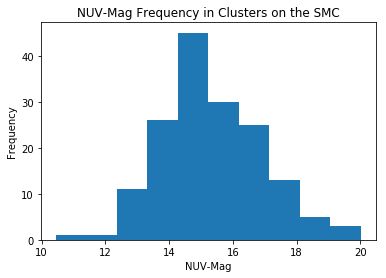

In [116]:
NUV_Mag2 = np.asarray(NUV_magnitude)
NUV_Mag = NUV_Mag2.flatten()
print(NUV_Mag)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
NBINS = 160
plt.hist(NUV_Mag)
plt.title("NUV-Mag Frequency in Clusters on the SMC")
plt.xlabel("NUV-Mag")
plt.ylabel("Frequency")